In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
train = pd.read_csv("input/cs-training.csv",index_col = 0)
#train.rename(columns={'Unnamed: 0': 'id'})

In [23]:
print(train.describe())

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                                4.192781    2

The column SeriousDlqin2yrs is what we will try to predict. However currently this training set classifies delinquency as a binary value and not in terms of probability. In the first iteration of this analysis we tried to predict in terms of binary classification, this time lets predict in terms of probability. 

We can assume that individuals with a value of "1" represents a 100% guarrantee of delinquency. However for those with a value of "0" can have a varying probability of delinquency within the next two years. 

We can see that 6.68% of people are considered to be seriously delinquent in the next two years.

Lets split the dataset into those who will and will not be seriously deliquent in two years. From this point on lets classify those who are determined to be deliquent in two years to be **"bad"**. This is only for easy reference and for the sake of not repeating the verbose phrase "seriously deliquent in two years".

In [24]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [25]:
train = train.fillna(value=0)

A correlation matrix can perhaps provide insight on features that heavily affect the classification of **bad** cases

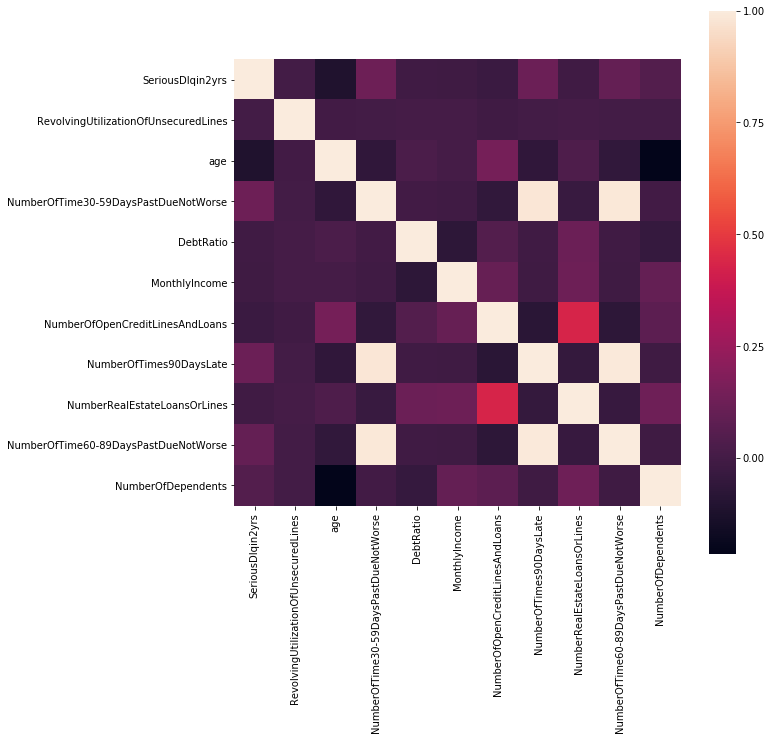

In [26]:
correlation_matrix = train.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, square = True)
plt.show()

According to this visualization the number of times 30-59 days and 60-89 days past due not worse are heavily correlated. This can justified fairly easily without many data insights. On the same note, these two features are also heavily correlated to number of times 90 days late. We can also see that the number of real estate loans or lines is related to the number of open credit lines and loans. According to this finding we can infer that around 50% of an individuals open credit lines are allocated toward real estate related expenses.

In [27]:
bad = train[train['SeriousDlqin2yrs']==1]
good = train[train['SeriousDlqin2yrs']==0]

In [28]:
def ratio(a, b):
    a = float(a)
    b = float(b)
    if b == 0:
        return a
    return ratio(b, a % b)

#returns a string with ratio for height and width
def get_ratio(a, b):
    r = ratio(a, b)
    return "%s" % float((a/r) / (b/r))

In [29]:
ratio(len(good),len(bad))

6.0

There is one bad case for every 6 good cases

Lets find out more on the characteristics of **bad** and **good** people

In [68]:
badAvg = bad.mean()
badAvg.pop('SeriousDlqin2yrs')
goodAvg = good.mean()
goodAvg.pop('SeriousDlqin2yrs')
temp = goodAvg.index.values

In [73]:
data = pd.DataFrame({'group':temp, 'good':goodAvg.values, 'bad':badAvg.values})

In [75]:
data

,group,good,bad
0,RevolvingUtilizationOfUnsecuredLines,6.168855,4.367282
1,age,52.751375,45.926591
2,NumberOfTime30-59DaysPastDueNotWorse,0.280109,2.388490
3,DebtRatio,357.151168,295.121066
4,MonthlyIncome,5395.030656,4693.478655
5,NumberOfOpenCreditLinesAndLoans,8.493620,7.882306
6,NumberOfTimes90DaysLate,0.135225,2.091362
7,NumberRealEstateLoansOrLines,1.020368,0.988530
8,NumberOfTime60-89DaysPastDueNotWorse,0.126666,1.828047
9,NumberOfDependents,0.723527,0.931279
